# Data Collection & Preparation

In this code the data of the lowest round way flight ticket between  Moscow (MOW) and  St Petersburg is calculated. These are the lowest prices from the month of April 2020 to March 2021. It will vary if the API is called in the later months.The prices are given in Russian Rubel (RUB). This analysis is helpful for the passengers travelling between these two cities. It shows the lowest price for the months so that they can plan their journey accordingly.

Note:- In case API doesn't work, please directly read data from "Combine_file"(In[226]).

In [1]:
#Importing the libraries required in the code
import json
import os
import urllib.request
import csv
import pandas as pd
import requests
import http.client
import json
from pandas.io.json import json_normalize
from pandas import DataFrame
import datetime

# Task 1: Identify one or more suitable web APIs

Here the the API is chosen from rapidapi. Along with this, a rapidapi-key and access-token is generated to get the data from the API. In this task 2 APIs are used. They are:




1) For getting the data of the lowest price of flights from Moscow to St Petersburg (April 2020 to March 2021)

2) For getting the data of the lowest price of flight from St Petersburg to Moscow (April 2020 to March 2021)

In [2]:
#This function calls the API with header and query and then stores the data in the json file.
#The data from this file is then stored in the given csv file. 

def get_API_data (querystring,csv_file): 
    url = "https://travelpayouts-travelpayouts-flight-data-v1.p.rapidapi.com/v1/prices/monthly" #common url of the API 
                                                                                               #common header with API key and access token 
    headers = {
    'x-rapidapi-host': "travelpayouts-travelpayouts-flight-data-v1.p.rapidapi.com",
    'x-rapidapi-key': "346fd63e91mshea4c10c07c55f82p1528b3jsn152d7d366045",
    'x-access-token': "5da0008ccfb5d3619a38f19ea7570123"
    }
    response = requests.request("GET", url, headers=headers, params=querystring) #request to get the data from the API
    json_data = json.loads(response.text)                                        #The data is converted into json data
    with open('jsonfile.json', 'w') as json_file:
        json.dump(json_data, json_file)                                          #The json data is stored in the json file 
    df = pd.read_json(r'jsonfile.json')                                          #Reading the data from the json file
    df.to_csv(csv_file)                                                          #converting the data and storing it in csv file
    

In both the calls only the query changes. As a result, query and name of the csv file is sent as parameters to the function.

In [3]:
querystring = {"currency":"RUB","length":"3","destination":"MOW","origin":"LED"}#query to get the data from LED to MOW
csv_file='LED_to_MOW_csv.csv'                                                   #The name of the csv file
get_API_data (querystring,csv_file)

In [4]:
querystring = {"currency":"RUB","length":"3","destination":"LED","origin":"MOW"}#query to get the data from MOW to LED
csv_file='MOW_to_LED_csv.csv'                                                   #the name of the csv file file
get_API_data (querystring,csv_file)


the data column in the csv file is having information which is used for further analysis

In [5]:
df = pd.read_csv(csv_file)
print(df['data'])

0     {'origin': 'MOW', 'destination': 'LED', 'price...
1     {'origin': 'MOW', 'destination': 'LED', 'price...
2     {'origin': 'MOW', 'destination': 'LED', 'price...
3     {'origin': 'MOW', 'destination': 'LED', 'price...
4     {'origin': 'MOW', 'destination': 'LED', 'price...
5     {'origin': 'MOW', 'destination': 'LED', 'price...
6     {'origin': 'MOW', 'destination': 'LED', 'price...
7     {'origin': 'MOW', 'destination': 'LED', 'price...
8     {'origin': 'MOW', 'destination': 'LED', 'price...
9     {'origin': 'MOW', 'destination': 'LED', 'price...
10    {'origin': 'MOW', 'destination': 'LED', 'price...
11    {'origin': 'MOW', 'destination': 'LED', 'price...
12    {'origin': 'MOW', 'destination': 'LED', 'price...
Name: data, dtype: object


# Sorting the column from the CSV file

The data stored in the csv file is not sorted. The column name "data" has all the useful data, so it is necessary to parse the data and store it in proper format.

In [6]:
#In this function the data from the column "Data" is sorted properly and stored in the same csv file
def Sorting_the_column (csv_file):
    df = pd.read_csv(csv_file)
    dataOfcolumn=(list)(df['data'])
    CsvFileData = open(csv_file, 'w',encoding='utf-8') #opening the csv file in the writing mode

    # create the csv writer object

    DataInCsv = csv.writer(CsvFileData,delimiter=',', lineterminator='\n', quotechar='"')

    count = 0

    for dataInRow in dataOfcolumn:
        dataInDict = eval(dataInRow) 
        if count == 0:                  #for the column name
                header = dataInDict.keys()#stroing the name of the column
                DataInCsv.writerow(header)#Writing the name of the column into the csv file
                count += 1
        DataInCsv.writerow(dataInDict.values())#writing into the csv object

    CsvFileData.close()

Updating the csv file with the sorted data of column "data" in LED_to_MOW_csv file

In [7]:
Sorting_the_column('LED_to_MOW_csv.csv')

Updating the csv file with the sorted data of column "data" in MOW_to_LED_csv file

In [8]:
Sorting_the_column('MOW_to_LED_csv.csv')

# Combining the required data and storing it in the csv file

Now the data is sorted properly in both the csv files.The necessary data is combined and stored in the csv file. Now we fetch 2 columns from each csv file 1. price and 2. airline and the month.

In [9]:
import calendar
data_from_LED_to_MOW_csv = pd.read_csv('LED_to_MOW_csv.csv',sep=',',parse_dates=False)#Data from csv file
data_from_MOW_to_LED_csv = pd.read_csv('MOW_to_LED_csv.csv',sep=',',parse_dates=False)#Data from csv file

Price_Col_LED_to_MOW = (list)(data_from_LED_to_MOW_csv['price'])    #coverting the data of the column into list
flights_Col_LED_to_MOW = (list)(data_from_LED_to_MOW_csv['airline'])#coverting the data of the column into list
Price_Col_MOW_to_LED = (list)(data_from_MOW_to_LED_csv['price'])    #coverting the data of the column into list
flights_Col_MOW_to_LED = (list)(data_from_MOW_to_LED_csv['airline'])#coverting the data of the column into list
Col_data_combine_file = []
dflistyear = (list)(data_from_LED_to_MOW_csv['departure_at'])      #Converting the departure time column into list
year=[]
month=[]
monthname=[]
serialnolist=list(range(13))
for date_time_str in dflistyear:                                 #Fetching the month and year from the departure data
    date_time_str=date_time_str.replace("T", " ")
    date_time_str=date_time_str.replace("Z", "")
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
    year.append(date_time_obj.date().year)
    month.append(date_time_obj.date().month)
    monthname.append(calendar.month_name[date_time_obj.date().month])
Col_data_combine_file.append(serialnolist)    
Col_data_combine_file.append(year)                  #Appending the year in the list 
Col_data_combine_file.append(month)                 #Appending the month in the list
Col_data_combine_file.append(monthname)
Col_data_combine_file.append(Price_Col_LED_to_MOW)  #Appending the price LED_to_MOW in the list
Col_data_combine_file.append(Price_Col_MOW_to_LED)  #Appending the price MOW_to_LED in the list
Col_data_combine_file.append(flights_Col_LED_to_MOW)#Appending the airline LED_to_MOW in the list
Col_data_combine_file.append(flights_Col_MOW_to_LED)#Appending the airline MOW_to_LED in the list
zip_data_to_write = zip(*Col_data_combine_file)         #converting the list into zip

In [10]:
#writing the zip data into csv file
with open('Combine_file.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, delimiter=',')
    count=0
    for word in zip_data_to_write:
        if count != 0:            #writing the data from the zip data
            wr.writerow(word)
        else:                     #Creating the column for the first iteration
            wr.writerow(['sequence','Year','Month','MonthName','LEDtoMOWprice','MOWtoLEDprice','LEDtoMOWflight','MOWtoLEDflight'])
            count = count+1
myfile.close() 

In [11]:
CombineCsv_data = pd.read_csv('Combine_file.csv') #Reading the combine csv file

Final data which will be used for analysis

In [12]:
CombineCsv_data

,sequence,Year,Month,MonthName,LEDtoMOWprice,MOWtoLEDprice,LEDtoMOWflight,MOWtoLEDflight
0,1,2020,9,September,1930,1930,UT,UT
1,2,2020,10,October,1930,1930,UT,UT
2,3,2020,11,November,3842,3677,DP,DP
3,4,2020,12,December,3712,3609,DP,DP
4,5,2021,1,January,3842,3506,DP,DP
5,6,2021,2,February,3842,3866,DP,DP
6,7,2021,3,March,3577,3505,DP,DP
7,8,2021,4,April,4199,4391,U6,U6
8,9,2021,5,May,4199,4391,U6,U6
9,10,2021,6,June,4391,4391,U6,U6


In [13]:
 #We need to find the missing values in the csv file
CombineCsv_data.isnull().sum() 

sequence          0
Year              0
Month             0
MonthName         0
LEDtoMOWprice     0
MOWtoLEDprice     0
LEDtoMOWflight    0
MOWtoLEDflight    0
dtype: int64

Above observation shows that there is no missing values in the Combine csv file

In [14]:
CombineCsv_data.dtypes.value_counts()#It is showing the number of columns and its data types

int64     5
object    3
dtype: int64

Now we have to filter out the columns which we are using for the further analysis. For this assignment, we will be using three columns for the analysis 'Month', 'Flight price from MOW to LED' and 'Flightprice from LED to MOW'.

In [15]:
from pandas import Grouper
CombineCsv_data_month= CombineCsv_data[["Month","MOWtoLEDprice","LEDtoMOWprice"]]
monthly = CombineCsv_data_month.groupby(Grouper(key='Month')) #Data is grouped on the basis of month
avg_month = monthly.mean() #Average of the month is taken
print(avg_month)

       MOWtoLEDprice  LEDtoMOWprice
Month                              
9               1930           1930
10              1930           1930
11              3677           3842
12              3609           3712
1               3506           3842
2               3866           3842
3               3505           3577
4               4391           4199
5               4391           4199
6               4391           4391
7               4391           4391
8               4391           4391


Below code is to get the detail information about the filtered data.

In [19]:
simplified_data = CombineCsv_data[["MOWtoLEDprice","LEDtoMOWprice"]]#the data which is need to be considered for further operations 
print(simplified_data.describe())#The information of the data which is chosen in the pervious step

       MOWtoLEDprice  LEDtoMOWprice
count      12.000000      12.000000
mean     3664.833333    3687.166667
std       891.902546     867.076261
min      1930.000000    1930.000000
25%      3505.750000    3678.250000
50%      3771.500000    3842.000000
75%      4391.000000    4247.000000
max      4391.000000    4391.000000


# Line Graph

<Figure size 432x288 with 0 Axes>

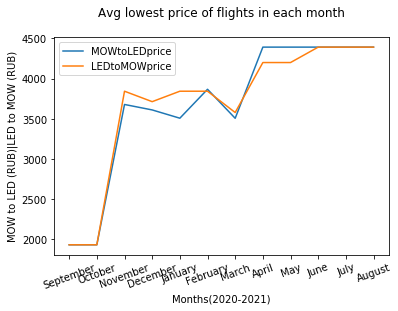

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
simplified_data.plot()
plt.xticks(CombineCsv_data['sequence']-1, CombineCsv_data['MonthName'],rotation=20) 
plt.title("Avg lowest price of flights in each month\n")
plt.ylabel("MOW to LED (RUB)|LED to MOW (RUB)")
plt.xlabel("Months(2020-2021)")
plt.show()

Above figure shows that the lowest price of the flights for a month is increasing. It is lowest in the intial months of 2020 and the lowest price increases with the month.

# Area Graph

<Figure size 432x288 with 0 Axes>

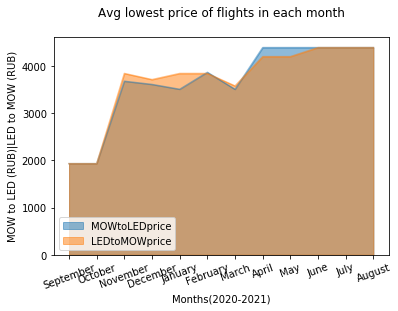

In [21]:
%matplotlib inline
plt.figure()
simplified_data.plot.area(stacked=False)
plt.title("Avg lowest price of flights in each month\n")
plt.ylabel("MOW to LED (RUB)|LED to MOW (RUB)")
plt.xlabel("Months(2020-2021)")
plt.xticks(CombineCsv_data['sequence']-1, CombineCsv_data['MonthName'],rotation=20)
plt.show()

Most of the area is covered by the graph of flights prices from MOW to LED and LED to MOW overlap. This means that both the prices are almost equal except for few months.

# Stacked Histogram

<Figure size 432x288 with 0 Axes>

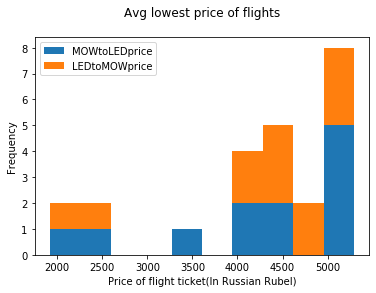

In [268]:

%matplotlib inline
plt.figure()
simplified_data.plot.hist(stacked=True)
plt.title("Avg lowest price of flights\n")
plt.xlabel("Price of flight ticket(In Russian Rubel)")
plt.show()

Above figure shows the number of price of tickets lying in the range shown on the x-axis 

# ScatterPlot

<Figure size 432x288 with 0 Axes>

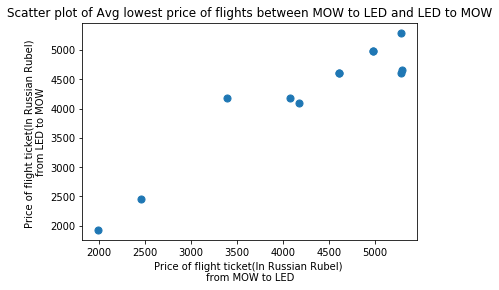

In [269]:
plt.figure()
avg_month.plot.scatter(x="MOWtoLEDprice", y="LEDtoMOWprice", s=50 )
plt.title("Scatter plot of Avg lowest price of flights between MOW to LED and LED to MOW")
plt.xlabel("Price of flight ticket(In Russian Rubel) \nfrom MOW to LED")
plt.ylabel("Price of flight ticket(In Russian Rubel) \nfrom LED to MOW")
plt.show()

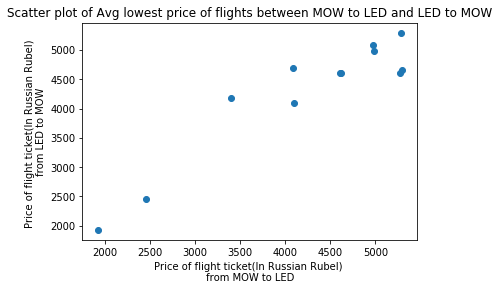

In [270]:
plt.figure()
plt.scatter(simplified_data['MOWtoLEDprice'], simplified_data['LEDtoMOWprice'])
plt.title("Scatter plot of Avg lowest price of flights between MOW to LED and LED to MOW")
plt.xlabel("Price of flight ticket(In Russian Rubel) \nfrom MOW to LED")
plt.ylabel("Price of flight ticket(In Russian Rubel) \nfrom LED to MOW")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001539215A488>,
      dtype=object)

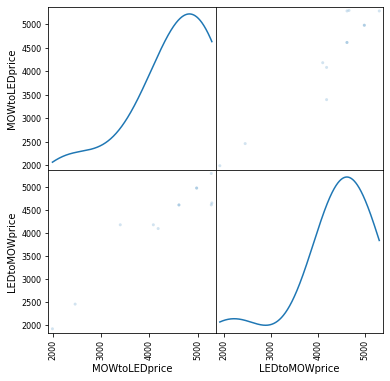

In [271]:
from pandas.plotting import scatter_matrix
scatter_matrix(avg_month, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015391F61508>,
      dtype=object)

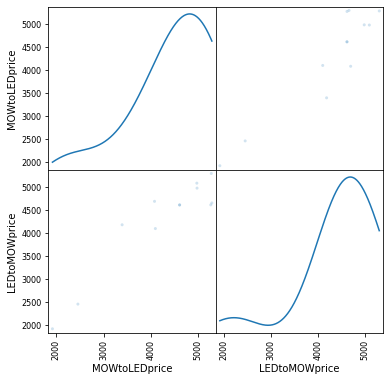

In [272]:
from pandas.plotting import scatter_matrix
scatter_matrix(simplified_data, alpha=0.2, figsize=(6, 6), diagonal='kde')

<Figure size 432x288 with 0 Axes>

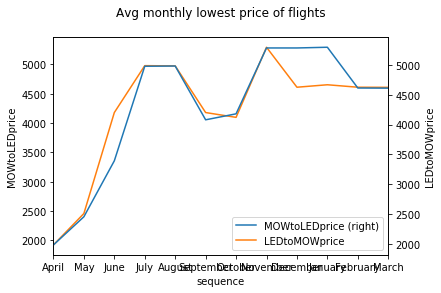

In [273]:
plt.figure()
CombineCsv_data_seq= CombineCsv_data[["sequence","MOWtoLEDprice","LEDtoMOWprice"]]
seq = CombineCsv_data_seq.groupby(Grouper(key='sequence')) #Data is grouped on the basis of month
seq_mean = seq.mean() #Average of the month is taken
ax = seq_mean.plot(secondary_y=['MOWtoLEDprice'])
ax.set_ylabel("MOWtoLEDprice")
ax.right_ax.set_ylabel('LEDtoMOWprice')

plt.title("Avg monthly lowest price of flights\n")

plt.xticks(CombineCsv_data['sequence'], CombineCsv_data['MonthName'],rotation=20) 
plt.xlabel("Month")
plt.show()

<Figure size 432x288 with 0 Axes>

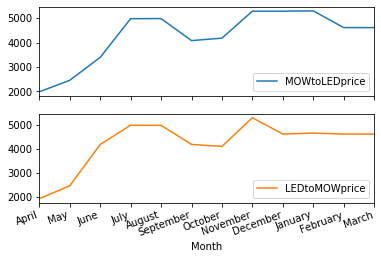

In [274]:
plt.figure()
seq_mean.plot(subplots=True);
plt.xticks(CombineCsv_data['sequence'], CombineCsv_data['MonthName'],rotation=20) 
plt.xlabel("Month")
plt.show()

# Final Manipulation, Exploration and Visualisation

In [275]:
#Avg flight price from LED to MOW with respect to flight prices from MOW to LED
#x-axis=MOW to LED flight price(In Russian Rubel)
#y-axis=LED to MOW flight price(In Russian Rubel)
avg_MOWtoLEDprice = seq_mean.groupby("MOWtoLEDprice") #Grouping the data with MOWtoLEDprice
MOWtoLEDprice_data = avg_MOWtoLEDprice.mean()#Taking the mean of the data grouped by MOWtoLEDprice
print(MOWtoLEDprice_data[0:11])

               LEDtoMOWprice
MOWtoLEDprice               
1987                    1922
2458                    2458
3394                    4180
4080                    4180
4180                    4098
4610                    4610
4612                    4612
4976                    4980
4980                    4976
5282                    4953
5294                    4654


<Figure size 432x288 with 0 Axes>

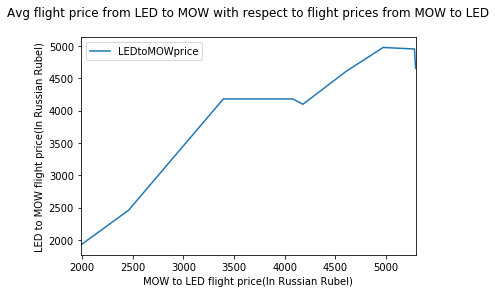

In [276]:
plt.figure()
avg_MOWtoLEDprice.mean().plot()
plt.title("Avg flight price from LED to MOW with respect to flight prices from MOW to LED\n")
plt.xlabel("MOW to LED flight price(In Russian Rubel)")
plt.ylabel("LED to MOW flight price(In Russian Rubel)")
plt.show()

The above figure shows the prices of flights from LED to MOW with respect to flight prices from MOW to LED. This will be helpful for the passengers who travel from MOW to LED and are planning to travel from LED to MOW.

In [277]:
#Avg flight price from MOW to LED with respect to flight prices from LED to MOW
#x-axis=LED to MOW flight price(In Russian Rubel)
#y-axis=MOW to LED flight price(In Russian Rubel)
avg_LEDtoMOWprice = avg_month.groupby("LEDtoMOWprice") #Grouping the data with LEDtoMOWprice
LEDtoMOWprice_data = avg_LEDtoMOWprice.mean() #Taking the mean of the data grouped by LEDtoMOWprice
print(LEDtoMOWprice_data[0:11])

               MOWtoLEDprice
LEDtoMOWprice               
1922                    1987
2458                    2458
4098                    4180
4180                    3737
4610                    4610
4612                    4947
4654                    5294
4976                    4980
4980                    4976
5294                    5282


<Figure size 432x288 with 0 Axes>

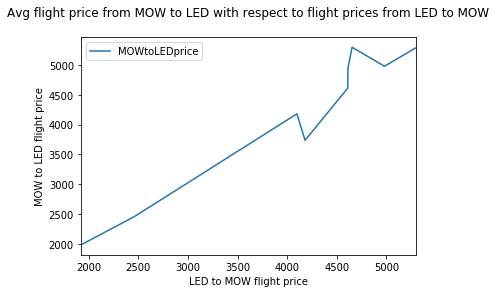

In [278]:
plt.figure()
avg_LEDtoMOWprice.mean().plot()
plt.title("Avg flight price from MOW to LED with respect to flight prices from LED to MOW\n")
plt.xlabel("LED to MOW flight price")
plt.ylabel("MOW to LED flight price")
plt.show()

The above figure shows the prices of flights from MOW to LED with respect to flight prices from LED to MOW. This will be helpful for the passengers who travel from LED to MOW and are planning to travel from MOW to LED.

# Conclusion of the Assignment

The data from the API changes everyday. It can help the passenger travelling between city of Moscow and St Petersburg. It is difficult to relate the pricing strategy of the airlines because fall or rise in the lowest ticket price is same for tickets of  Moscow and St Petersburg but if it is observed properly then it can be seen that whenever there is more migration of passengers, the price of the flights are high espicially during New year, Christmas etc. Also a pattern can be seen in the changing of flight prices. 